# Lenet-5 
Lenet-5 CNN architecture is made up of 7 layers.The layers composition consists of 3 convolution layers, 2 sub-sampling layers and 2 fully connected layers

<img src="lenet.png">

<img src="architecture.png" height="200" width="800">

# We'll use the lenet architecture for MNIST classification

In [22]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
from keras.layers import Conv2D,AveragePooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping

In [23]:
(train_x,train_y),(test_x,test_y)=keras.datasets.mnist.load_data()

In [24]:
print(train_x.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


In [25]:
train_x=tf.expand_dims(train_x,3)
test_x=tf.expand_dims(test_x,3)
val_x = train_x[:5000]
val_y = train_y[:5000]

In [26]:
lenet_model=keras.models.Sequential()
lenet_model.add(Conv2D(filters=6,kernel_size=5,strides=1,activation='tanh',input_shape=train_x[0].shape,padding='same'))
lenet_model.add(AveragePooling2D())
lenet_model.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
lenet_model.add(AveragePooling2D())
lenet_model.add(Flatten())
lenet_model.add(Dense(120,activation='tanh'))
lenet_model.add(Dense(84,activation='tanh'))
lenet_model.add(Dense(10,activation='softmax'))

In [27]:
lenet_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [28]:
history=lenet_model.fit(train_x,train_y,epochs=100,validation_data=(val_x,val_y),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.000001)])

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3055 - accuracy: 0.9073 - val_loss: 0.0701 - val_accuracy: 0.9814
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0534 - val_accuracy: 0.9828
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0338 - val_accuracy: 0.9908
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 0.0344 - val_accuracy: 0.9902


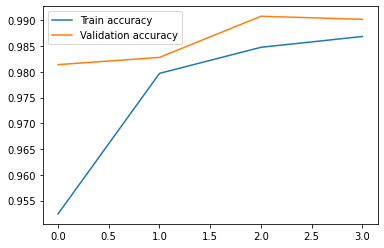

In [32]:
from matplotlib import pyplot as plt
number_epochs=np.arange(len(history.history['val_loss']))
plt.plot(number_epochs,history.history['accuracy'],label='Train accuracy')
plt.plot(number_epochs,history.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()